<a href="https://www.kaggle.com/code/sonalanand/netflix-titles-02-b?scriptVersionId=223823217" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# File path to the desktop
file_path = "/Users/Apple/Desktop/netflix_titles.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Preview the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


📌 Day 2 - Data Analysis & Visualization Questions (Netflix Dataset)


1. Data Cleaning & Handling Missing Values
Q1: Identify Missing Values
Find the total missing values per column in the dataset.


Q2: Handle Missing Values in the cast Column
Replace missing values for cast with "Not Available".


Q3: Normalize Ratings
Some ratings may be inconsistent.
Merge similar categories (e.g., TV-MA and MA should be considered the same).


Q4: Detect & Remove Duplicate Titles
Check if there are duplicate titles in the dataset.
If duplicates exist, drop them while keeping the first occurrence.


2. Feature Engineering (Creating New Insights)
Q5: Extract the Primary Genre
The listed_in column contains multiple genres.
Extract only the first genre (e.g., "Dramas, International Movies" → "Dramas").


Q6: Categorize Titles by Decade
Create a new column that categorizes titles into decades (2000s, 2010s, etc.).


Q7: Identify the Top 10 Directors with Most Releases
Find the top 10 directors who have created the most content.


Q8: Add a Column for "Old vs. New"
Titles before 2000 → "Old"
Titles from 2000 onwards → "New"


3. Data Aggregation & Trend Analysis
Q9: Find the Most Common Movie Length Category
Among "Short", "Medium", and "Long", which category appears most frequently?

Q10: Which Countries Have Produced the Most Content?
Count the number of titles per country and display the top 10.

Q11: What is the Trend of Movies vs. TV Shows Over Time?
How has the ratio of Movies vs TV Shows changed over the years?
Visualize this trend using a line plot.

Q12: What are the Most Popular Genres?
Count the number of titles per primary genre and display the top 5.


4. Data Visualization & Insights
Q13: Bar Plot - Top 10 Countries Producing Content
Plot a bar chart showing the top 10 countries with the highest number of titles.

Q14: Heatmap - Correlation Between Numerical Features
Create a heatmap to check if release_year, duration, and added_year are correlated.

Q15: Box Plot - Duration Distribution for Movies & TV Shows
Compare the duration of Movies vs TV Shows using a boxplot.

Q16: Pie Chart - Content Distribution by Rating
Visualize the proportion of each rating category using a pie chart.

Q17: Line Plot - Trend of Movie vs. TV Show Releases Over Time
Create a line plot to visualize the number of Movies vs. TV Shows released each year.

Q1: Identify Missing Values Find the total missing values per column in the dataset. 

In [89]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [93]:
for x in df.columns:
    print(x)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [95]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Q2: Handle Missing Values in the cast Column
Replace missing values for cast with "Not Available".
Replace:in director: Replace missing values with "Unknown". 
country: Replace missing values with "Not Specified".

In [97]:
df['cast'] = df['cast'].fillna('Not Available')
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Not Specified')

Q3: Normalize Ratings
Some ratings may be inconsistent.
Merge similar categories (e.g., TV-MA and MA should be considered the same).

Issues Found

1️⃣ Invalid Ratings (Contain Duration)

'74 min', '84 min', '66 min' → These do not belong in the rating column.

2️⃣ Similar Categories That Need Merging

'TV-Y7-FV' should be merged with 'TV-Y7'.
'NC-17' should be standardized as 'NC 17'.
'PG-13' should be standardized as 'PG 13'.
'UR' should be renamed to 'Unrated'.
'NR' should be renamed to 'Not Rated'.

3️⃣ Missing Values (nan)

Needs to be handled properly.

In [99]:
print(df['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [101]:
df = df[~df['rating'].astype(str).str.contains('min',na = False)].copy()
# df['rating'] = df['rating'].apply(lambda x: 'Not Rated' if 'min' in str(x) else x)             #2nd way


df.loc[:, 'rating'] = df['rating'].replace({
    'TV-Y7-FV' : 'TV Y7',
    'NC-17' : 'NC 17',
    'PG-13' : 'PG 13',
    'UR' : 'Unrated',
    'NR' : 'Not Rated',
    'TV-14' : 'TV 14',
    'PG' : 'TV PG',
    'G' : 'TV PG',
    'TV-G' : 'TV PG',
    'TV-MA' : 'TV MA',
    'TV-PG' : 'TV PG',
    'TV-Y' : 'TV Y',
    'TV-Y7' : 'TV Y7'
    })


df.loc[:, 'rating'] = df['rating'].fillna('Not Rated')

In [103]:
df['rating'].value_counts()

rating
TV MA        3207
TV 14        2160
TV PG        1411
R             799
PG 13         490
TV Y7         340
TV Y          307
Not Rated      84
NC 17           3
Unrated         3
Name: count, dtype: int64

Q4: Detect & Remove Duplicate Titles
Check if there are duplicate titles in the dataset.
If duplicates exist, drop them while keeping the first occurrence.

In [105]:
df['title'].duplicated().sum()

# df = df.drop_duplicates(subset=['title'], keep='first')           # if there were duplicates.


0

Q5: Extract the Primary Genre
The listed_in column contains multiple genres.
Extract only the first genre (e.g., "Dramas, International Movies" → "Dramas").

In [107]:
df['Primary Genre'] = df['listed_in'].apply(lambda x : x.split(',')[0] if pd.notna(x) else 'Unknown')
df['Primary Genre']

0                  Documentaries
1         International TV Shows
2                 Crime TV Shows
3                     Docuseries
4         International TV Shows
                  ...           
8802                 Cult Movies
8803                    Kids' TV
8804                    Comedies
8805    Children & Family Movies
8806                      Dramas
Name: Primary Genre, Length: 8804, dtype: object

Q6: Categorize Titles by Decade
Create a new column that categorizes titles into decades (2000s, 2010s, etc.).

In [109]:
df['Decade Year'] = (df['release_year'] // 10) * 10
df['Decade Year'] = df['Decade Year'].astype(str) + "'s"

Q7: Identify the Top 10 Directors with Most Releases Find the top 10 directors who have created the most content.

In [111]:
top_ten_director = df.groupby('director')['title'].count().sort_values(ascending = False).head(10)
top_ten_director

director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: title, dtype: int64

Q8: Add a Column for "Old vs. New" Titles before 2000 → "Old" Titles from 2000 onwards → "New"

In [113]:
df['Old vs. New'] = df['release_year'].apply(lambda x : 'Old' if x < 2000 else 'New')

Q9: Find the Most Common Movie Length Category Among "Short", "Medium", and "Long", which category appears most frequently?

In [115]:
df['duration'] = df['duration'].str.replace(' min','', regex = True)
df['duration'] = df['duration'].str.replace(' Season', '', regex = True).str.replace('s', '', regex = True)

In [121]:
df['duration'] = pd.to_numeric(df['duration'], errors = 'coerce')

In [131]:
df.loc[df['type'] == 'Movie','duration_category'] = df.loc[df['type'] == 
'Movie','duration'].apply(lambda x : 'Short-Movie' if x <= 90 else 'Medium-Movie' if 90 < x <= 150 else 'Long-Movie')


df.loc[df['type'] == 'TV Show','duration_category'] = df.loc[df['type'] ==
'TV Show','duration'].apply(lambda x : 'Mini-Series' if x == 1 else 'Medium-Series' if 2 <= x <= 3 else 'Long-Series')

In [139]:
most_common_movie = df[df['type'] == 'Movie']
most_common_movie['duration_category'].value_counts()

duration_category
Medium-Movie    3893
Short-Movie     1990
Long-Movie       245
Name: count, dtype: int64

In [141]:
most_common_series = df[df['type'] == 'TV Show']
most_common_series['duration_category'].value_counts()

duration_category
Mini-Series      1793
Medium-Series     624
Long-Series       259
Name: count, dtype: int64

Q10: Which Countries Have Produced the Most Content? Count the number of titles per country and display the top 10.

In [144]:
most_content_country = df.groupby('country')['title'].count().sort_values(ascending = False)
most_content_country.head(10)

country
United States     2815
India              972
Not Specified      831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: title, dtype: int64

Q11: What is the Trend of Movies vs. TV Shows Over Time? How has the ratio of Movies vs TV Shows changed over the years? Visualize this trend using a line plot.

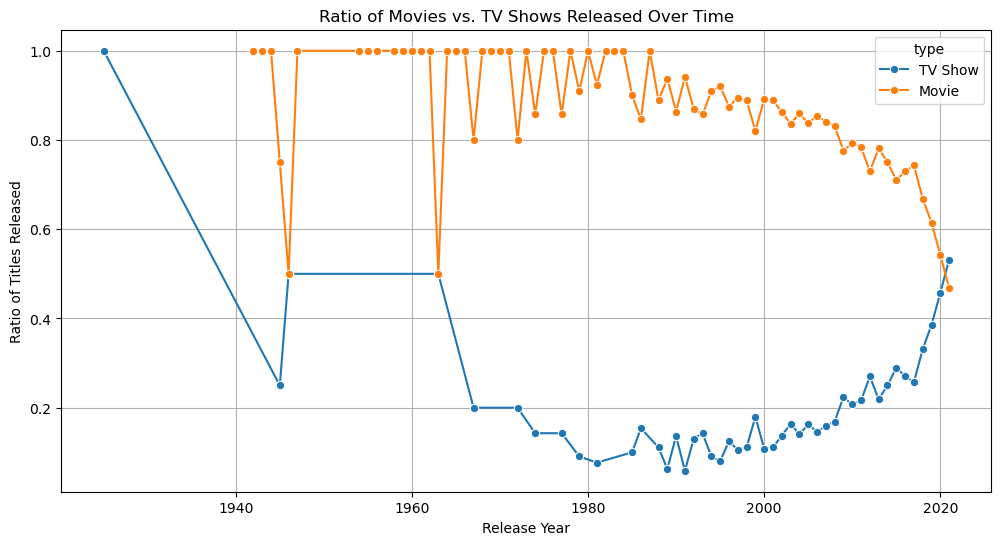

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of Movies & TV Shows per year
movies_vs_tvshows = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Calculate ratio of Movies per year
total_per_year = movies_vs_tvshows.groupby('release_year')['count'].sum().reset_index()
movies_vs_tvshows = movies_vs_tvshows.merge(total_per_year, on='release_year', suffixes=('', '_total'))
movies_vs_tvshows['ratio'] = movies_vs_tvshows['count'] / movies_vs_tvshows['count_total']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_vs_tvshows, x='release_year', y='ratio', hue='type', marker='o')

plt.xlabel("Release Year")
plt.ylabel("Ratio of Titles Released")
plt.title("Ratio of Movies vs. TV Shows Released Over Time")
plt.grid(True)
plt.show()


Q12: What are the Most Popular Genres? Count the number of titles per primary genre and display the top 5.

In [172]:
most_popular_genre = df.groupby('Primary Genre')['title'].count().sort_values(ascending = False)
most_popular_genre.head(5)

Primary Genre
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: title, dtype: int64

Q13: Bar Plot - Top 10 Countries Producing Content Plot a bar chart showing the top 10 countries with the highest number of titles.

In [182]:
highest_title_country = df.groupby('country')['title'].count().sort_values(ascending = False).head(10)

In [184]:
highest_title_country = highest_title_country.reset_index()

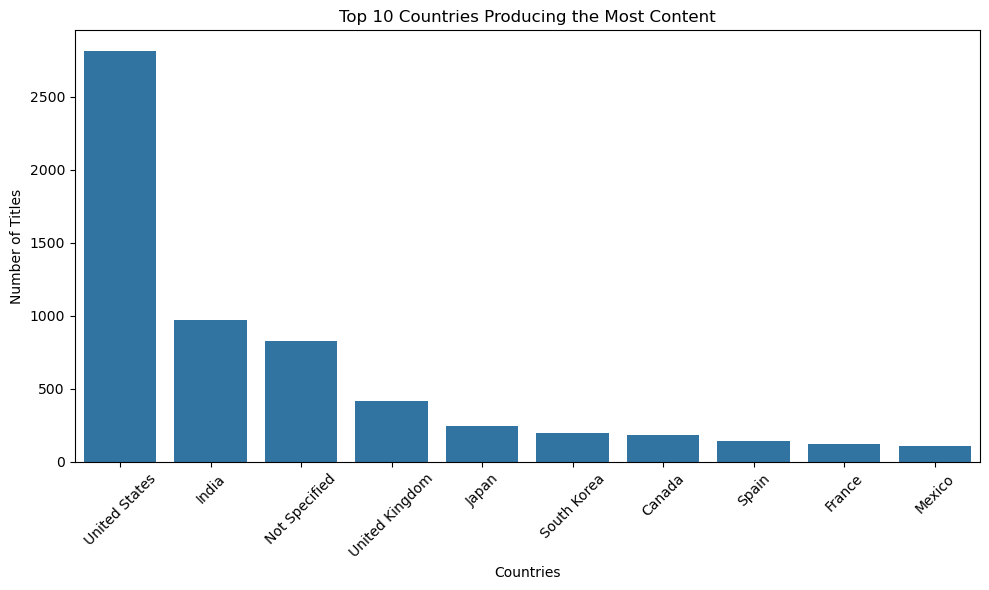

In [186]:
plt.figure(figsize = (10,6))



sns.barplot(data = highest_title_country, x = 'country' , y = 'title')


plt.xlabel("Countries")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries Producing the Most Content")



plt.xticks(rotation=45)
plt.tight_layout()



plt.show()

Q14: Heatmap - Correlation Between Numerical Features Create a heatmap to check if release_year, duration, and added_year are correlated.

In [195]:
df['date_added'] = df['date_added'].astype(str)

df['date_added'] = df['date_added'].str.strip()

In [197]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [205]:
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_day'] = df['date_added'].dt.day

In [209]:
df['added_year'] = df['added_year'].fillna(0).astype(int)
df['added_month'] = df['added_month'].fillna(0).astype(int)         # converted new columns to int from float.
df['added_day'] = df['added_day'].fillna(0).astype(int)

In [215]:
df_numeric = df[['release_year','duration','added_year']]

In [217]:
correlation_matrix = df_numeric.corr()

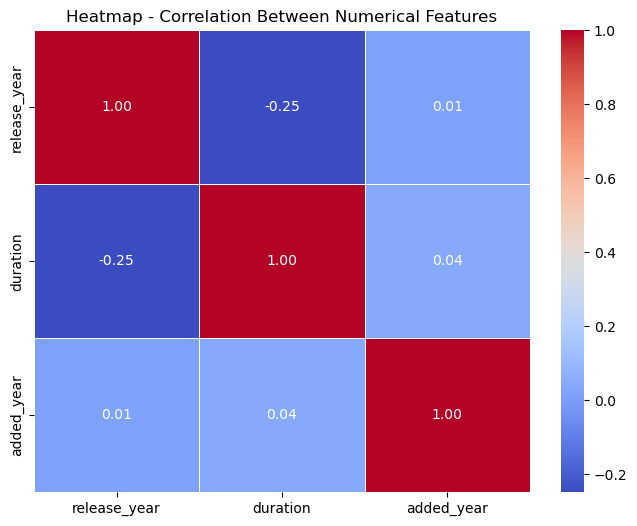

In [224]:
plt.figure(figsize=(8, 6))



sns.heatmap(data = correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Heatmap - Correlation Between Numerical Features")
plt.show()

Q15: Box Plot - Duration Distribution for Movies & TV Shows Compare the duration of Movies vs TV Shows using a boxplot.

/var/folders/b1/5xzhz9t52rz_q5h91dhcrt340000gn/T/ipykernel_18500/2412852124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='duration', palette='Set2')


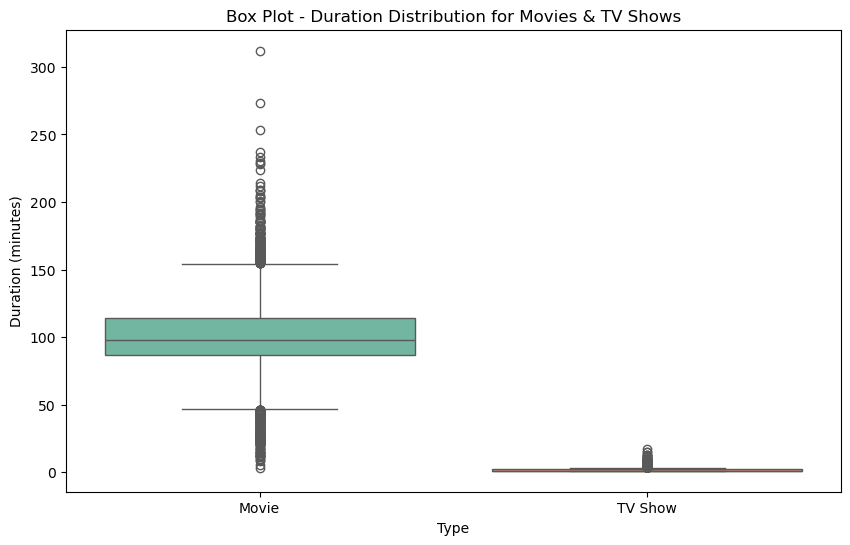

In [230]:
plt.figure(figsize=(10, 6))


sns.boxplot(data=df, x='type', y='duration', palette='Set2')


plt.xlabel("Type")
plt.ylabel("Duration (minutes)")
plt.title("Box Plot - Duration Distribution for Movies & TV Shows")


plt.show()

/var/folders/b1/5xzhz9t52rz_q5h91dhcrt340000gn/T/ipykernel_18500/1716898663.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['type'] == 'Movie'], x='type', y='duration', ax=axes[0], palette='Set2')
/var/folders/b1/5xzhz9t52rz_q5h91dhcrt340000gn/T/ipykernel_18500/1716898663.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['type'] == 'TV Show'], x='type', y='duration', ax=axes[1], palette='Set3')


<Figure size 1200x600 with 0 Axes>

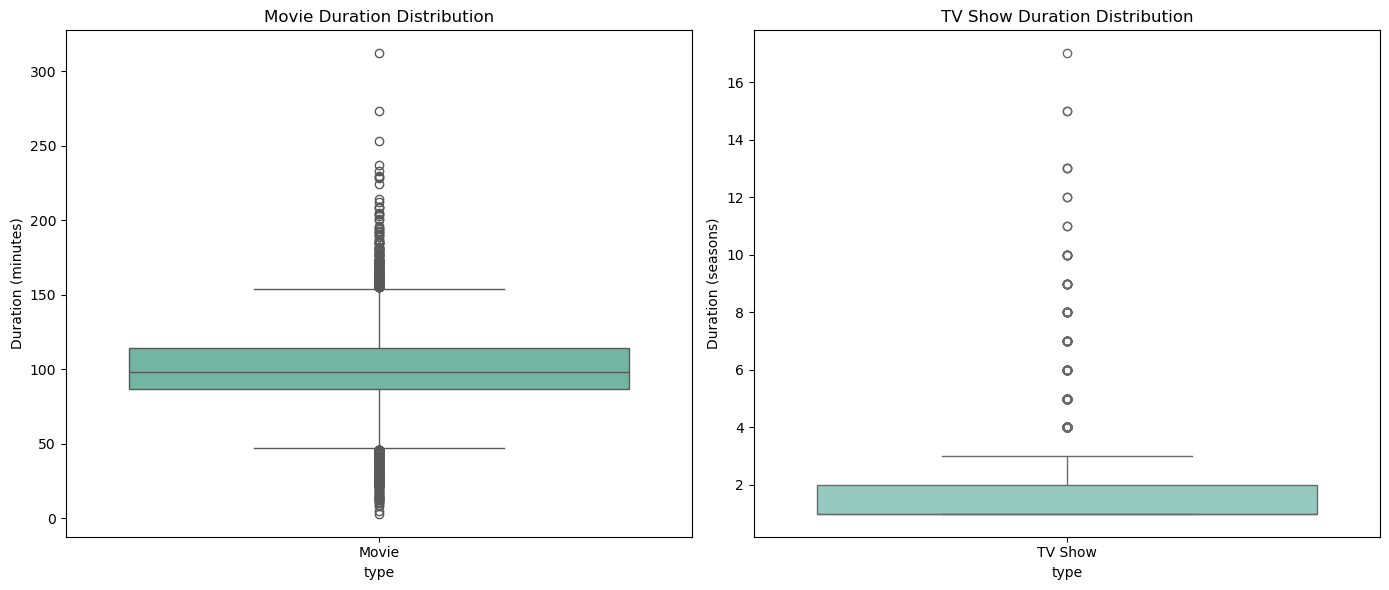

In [233]:
plt.figure(figsize=(12, 6))                            # approach 2 doing it seperately.

# Separate boxplots for Movies and TV Shows
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Movie Duration Boxplot
sns.boxplot(data=df[df['type'] == 'Movie'], x='type', y='duration', ax=axes[0], palette='Set2')
axes[0].set_title("Movie Duration Distribution")
axes[0].set_ylabel("Duration (minutes)")

# TV Show Duration Boxplot
sns.boxplot(data=df[df['type'] == 'TV Show'], x='type', y='duration', ax=axes[1], palette='Set3')
axes[1].set_title("TV Show Duration Distribution")
axes[1].set_ylabel("Duration (seasons)")

plt.tight_layout()
plt.show()


Q16: Pie Chart - Content Distribution by Rating Visualize the proportion of each rating category using a pie chart.

In [239]:
category_count = df['rating'].value_counts()

label = category_count.index
sizes = category_count.values

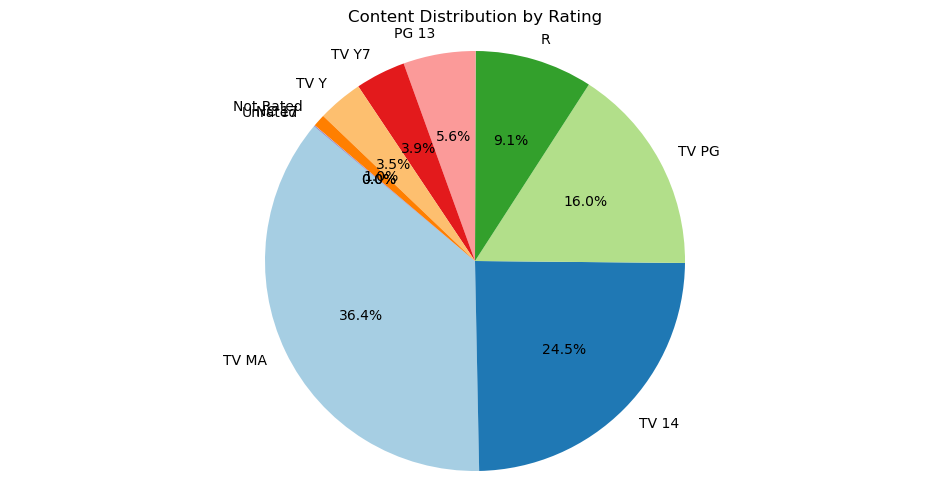

In [245]:
plt.figure(figsize=(12, 6))


plt.pie(sizes, labels = label, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)



plt.title("Content Distribution by Rating")
plt.axis('equal')                                 # Equal aspect ratio ensures the pie chart is circular.



plt.show()

Q17: Line Plot - Trend of Movie vs. TV Show Releases Over Time Create a line plot to visualize the number of 
      Movies vs. TV Shows released each year.

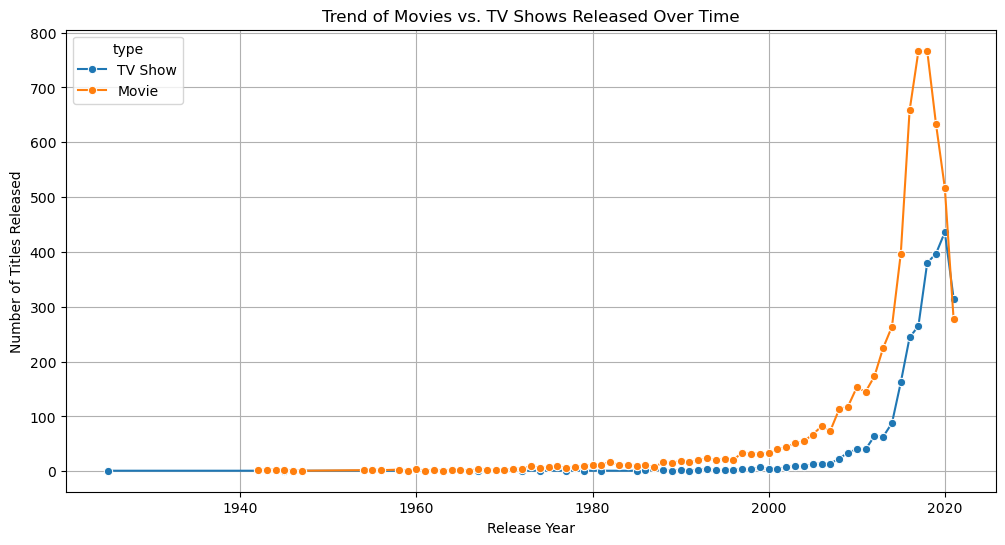

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of Movies & TV Shows per year
movies_vs_tvshows = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_vs_tvshows, x='release_year', y='count', hue='type', marker='o')

plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.title("Trend of Movies vs. TV Shows Released Over Time")
plt.grid(True)
plt.show()
